In [11]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras import backend as k
import matplotlib.pyplot as plt

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

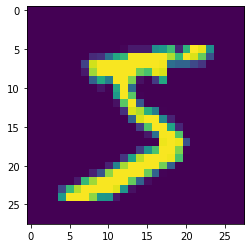

In [18]:
plt.imshow(x_train[0])

In [19]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [20]:
y_train[0]

5

In [21]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [25]:
x_train.shape

(60000, 28, 28, 1)

In [26]:
 x_test.shape

(10000, 28, 28, 1)

## CNN Model

In [57]:
model = Sequential()
model.add(Conv2D(8,(3,3),activation = "relu",input_shape = input_shape))

model.add(Conv2D(16,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
             metrics = ["accuracy"])

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                147520    
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)               

In [59]:
history = model.fit(x_train,y_train,batch_size=256,epochs=8,verbose=1,
                   validation_data=(x_test,y_test))

Epoch 1/8
235/235 [==============================] - 4s 13ms/step - loss: 0.6031 - accuracy: 0.8103 - val_loss: 0.1315 - val_accuracy: 0.9606
Epoch 2/8
235/235 [==============================] - 3s 12ms/step - loss: 0.2457 - accuracy: 0.9280 - val_loss: 0.0863 - val_accuracy: 0.9733
Epoch 3/8
235/235 [==============================] - 3s 12ms/step - loss: 0.1887 - accuracy: 0.9436 - val_loss: 0.0672 - val_accuracy: 0.9784
Epoch 4/8
235/235 [==============================] - 3s 12ms/step - loss: 0.1619 - accuracy: 0.9519 - val_loss: 0.0599 - val_accuracy: 0.9803
Epoch 5/8
235/235 [==============================] - 3s 11ms/step - loss: 0.1467 - accuracy: 0.9567 - val_loss: 0.0569 - val_accuracy: 0.9820
Epoch 6/8
235/235 [==============================] - 3s 12ms/step - loss: 0.1344 - accuracy: 0.9601 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 7/8
235/235 [==============================] - 3s 12ms/step - loss: 0.1229 - accuracy: 0.9632 - val_loss: 0.0455 - val_accuracy: 0.9856
Epoch 

In [60]:
model.evaluate(x_test, y_test, verbose=0)

[0.04356089234352112, 0.9854999780654907]

In [61]:
model.save("digit.h5")
model.save_weights("digit_weight.h5")